In [3]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

### Problem H

problem C with few players

In [13]:
def simulate_game(capitals, players_prob, N):
    players=len(players_prob)
    player_ruins = [0] * players
    for i in range(N):
        player_capitals = [] 
        lottery_tickets=[]
        for i in range(players):
            player_capitals.append(capitals[i])
            player_tickets = [i] * int(players_prob[i] * 100)
            lottery_tickets.extend(player_tickets)
                              
        while not (0 in player_capitals):
            result=random.randint(0,len(lottery_tickets)-1)
            winner = lottery_tickets[result]
            i=0
            for i in range(players):
                if i == winner:
                    player_capitals[i]+=4
                    continue
                player_capitals[i]-=1
                if player_capitals[i]==0:
                    player_ruins[i]+=1
    
    p_of_ruin = player_ruins[0]/N

    return p_of_ruin

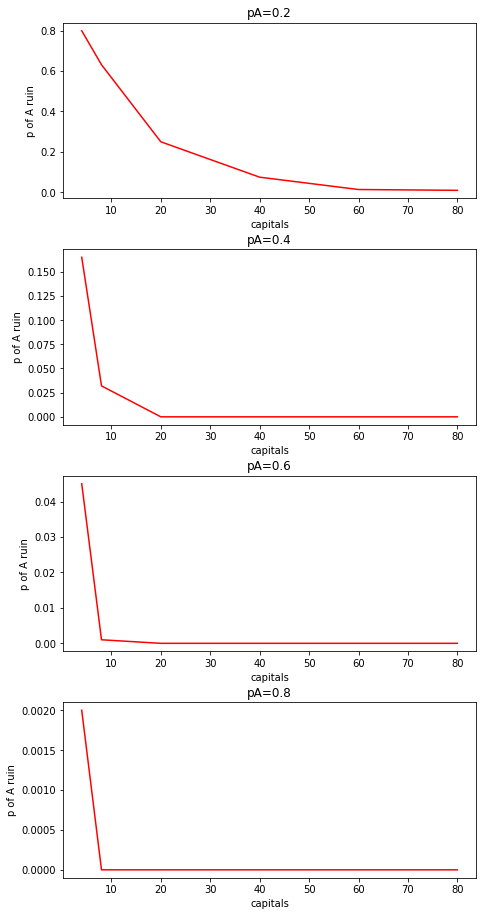

In [14]:
capitals = [4,8,20,40,60,80] 
probs = [1/5,2/5,3/5,4/5]
plots=len(probs)
rounds=1000

fig,ax =  plt.subplots(plots,figsize=(7,13))
fig.tight_layout(pad=3.0)
for j in range(plots):
    p=probs[j]
    propabilities=[p]
    propabilities.extend([(1-p)/4]*4)
    prob_of_ruin_sim=[]
    
    for capital in capitals:
        player_capitals=[capital]
        player_capitals.extend([int((100-p)/4)]*4)
        prob_of_ruin_sim.append(simulate_game(player_capitals,propabilities,rounds))
    ax[j].set_xlabel('capitals')
    ax[j].set_ylabel('p of A ruin')
    ax[j].set_title("pA=" + str(p))
    ax[j].plot(capitals,prob_of_ruin_sim, color = "red")
plt.show()